In [20]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL._imaging import display
from scipy import stats

train_data_file = 'data/zhengqi_train.txt'
test_data_file = 'data/zhengqi_test.txt'

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

Print Box-Line Figure

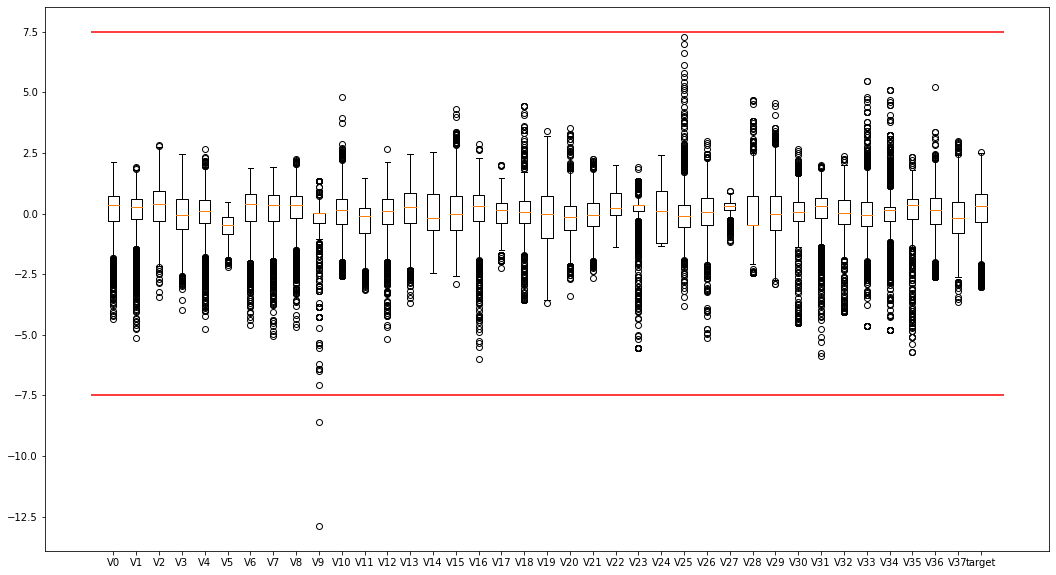

In [21]:
plt.figure(figsize=(18, 10))
plt.boxplot(x=train_data, labels=train_data.columns)
plt.hlines([-7.5, 7.5], 0, 40, colors='r')
plt.show()

In [24]:
train_data = train_data[train_data['V9']>-7.5]
test_data = test_data[test_data['V9']>-7.5]
train_data.describe()
test_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,-0.184404,-0.083912,-0.434762,0.101671,-0.019172,0.838049,-0.274092,-0.173971,-0.266709,0.255114,...,-0.206871,-0.146463,-0.083215,-0.191729,-0.030782,-0.011433,-0.009985,-0.296895,-0.046270,0.195735
std,1.073333,1.076670,0.969541,1.034925,1.147286,0.963043,1.054119,1.040101,1.085916,1.014394,...,1.064140,0.880593,1.126414,1.138454,1.130228,0.989732,0.995213,0.946896,1.040854,0.940599
min,-4.814000,-5.488000,-4.283000,-3.276000,-4.921000,-1.168000,-5.649000,-5.625000,-6.059000,-6.784000,...,-2.435000,-2.413000,-4.507000,-7.698000,-4.057000,-4.627000,-4.789000,-7.477000,-2.608000,-3.346000
25%,-0.664000,-0.451000,-0.978000,-0.644000,-0.497000,0.122000,-0.732000,-0.509000,-0.775000,-0.390000,...,-0.453000,-0.818000,-0.339000,-0.476000,-0.472000,-0.460000,-0.290000,-0.349000,-0.593000,-0.432000
50%,0.065000,0.195000,-0.267000,0.220000,0.118000,0.437000,-0.082000,0.018000,-0.004000,0.401000,...,-0.445000,-0.199000,0.010000,0.100000,0.155000,-0.040000,0.160000,-0.270000,0.083000,0.152000
75%,0.549000,0.589000,0.278000,0.793000,0.610000,1.928000,0.457000,0.515000,0.482000,0.904000,...,-0.434000,0.468000,0.447000,0.471000,0.627000,0.419000,0.273000,0.364000,0.651000,0.797000
max,2.100000,2.120000,1.946000,2.603000,4.475000,3.176000,1.528000,1.394000,2.408000,1.766000,...,4.656000,3.022000,3.139000,1.428000,2.299000,5.465000,5.110000,1.671000,2.861000,3.021000


Interval scaling

In [25]:
from sklearn import preprocessing

feature_columns = [col for col in train_data.columns if col not in ['target']]
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(train_data[feature_columns])

train_data_scaler = min_max_scaler.transform(train_data[feature_columns])
test_data_scaler = min_max_scaler.transform(test_data[feature_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = feature_columns
train_data_scaler['target'] = train_data['target']

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = feature_columns

train_data_scaler.describe()
test_data_scaler.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,0.642905,0.715637,0.477791,0.632726,0.635558,1.130681,0.664798,0.699688,0.637926,0.871534,...,0.313556,0.369132,0.614756,0.719928,0.623793,0.457349,0.482778,0.673164,0.326501,0.577034
std,0.166253,0.152936,0.155176,0.161379,0.154392,0.360555,0.162899,0.149311,0.156540,0.120675,...,0.149752,0.117538,0.156533,0.144621,0.175284,0.098071,0.100537,0.118082,0.132661,0.141870
min,-0.074195,-0.051989,-0.138124,0.106035,-0.024088,0.379633,-0.165817,-0.082831,-0.197059,0.034142,...,0.000000,0.066604,0.000000,-0.233613,-0.000620,0.000000,0.000000,-0.222222,0.000000,0.042836
25%,0.568618,0.663494,0.390845,0.516451,0.571256,0.862598,0.594035,0.651593,0.564653,0.794789,...,0.278919,0.279498,0.579211,0.683816,0.555366,0.412901,0.454490,0.666667,0.256819,0.482353
50%,0.681537,0.755256,0.504641,0.651177,0.654017,0.980532,0.694483,0.727247,0.675796,0.888889,...,0.280045,0.362120,0.627710,0.756987,0.652605,0.454518,0.499949,0.676518,0.342977,0.570437
75%,0.756506,0.811222,0.591869,0.740527,0.720226,1.538750,0.777778,0.798593,0.745856,0.948727,...,0.281593,0.451148,0.688438,0.804116,0.725806,0.500000,0.511365,0.755580,0.415371,0.667722
max,0.996747,1.028693,0.858835,1.022766,1.240345,2.005990,0.943285,0.924777,1.023497,1.051273,...,0.997889,0.792045,1.062535,0.925686,0.985112,1.000000,1.000000,0.918568,0.697043,1.003167


View Relativity of Features (Unused)

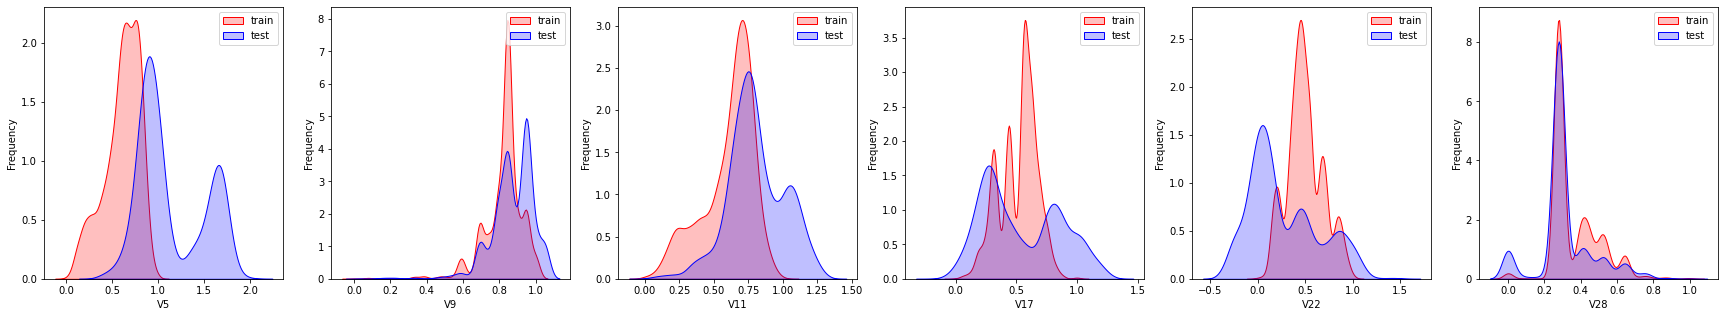

In [28]:
drop_col = 6
drop_row = 1
plt.figure(figsize=(5 * drop_col, 5 * drop_row))

for i, col in enumerate(['V5', 'V9', 'V11', 'V17', 'V22', 'V28']):
    ax = plt.subplot(drop_row, drop_col, i+1)
    ax = sns.kdeplot(train_data_scaler[col], color='Red', shade=True)
    ax = sns.kdeplot(test_data_scaler[col], color='Blue', shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train", "test"])
plt.show()

View Relativity of Features

C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


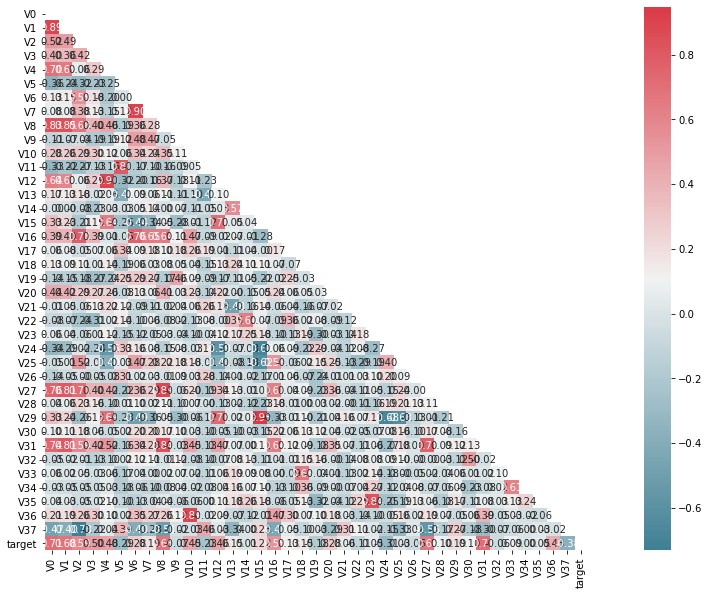

target    1.000000
V0        0.712403
V31       0.711636
V1        0.682909
V8        0.679469
V27       0.657398
V2        0.585850
V16       0.545793
V3        0.501622
V4        0.478683
V12       0.460300
V10       0.448682
V36       0.425991
V37       0.376443
V24       0.305526
V5        0.286076
V6        0.280195
V20       0.278381
V11       0.234551
V15       0.221290
V29       0.190109
V7        0.185321
V19       0.180111
V18       0.149741
V13       0.149199
V17       0.126262
V22       0.112743
V30       0.101378
Name: target, dtype: float64
          target        V0       V31        V1        V8       V27        V2  \
target  1.000000  0.712403  0.711636  0.682909  0.679469  0.657398  0.585850   
V0      0.712403  1.000000  0.739116  0.894116  0.832151  0.763128  0.516817   
V31     0.711636  0.739116  1.000000  0.807585  0.841469  0.765750  0.589890   
V1      0.682909  0.894116  0.807585  1.000000  0.849034  0.807102  0.490239   
V8      0.679469  0.832151  0.841469  0

In [31]:
plt.figure(figsize=(20, 10))
column = train_data_scaler.columns.tolist()
mcorr = train_data_scaler[column].corr(method="spearman")
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
plt.show()
mcorr = mcorr.abs()
numerical_corr = mcorr[mcorr['target']>0.1]['target']
print(numerical_corr.sort_values(ascending=False))

index0 = numerical_corr.sort_values(ascending=False).index
print(train_data_scaler[index0].corr('spearman'))

Multicollinearity Analysis

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

new_numerical = ['V0', 'V2', 'V3', 'V4', 'V5', 'V6', 'V10',
                 'V11', 'V13', 'V15', 'V16', 'V18', 'V19', 'V20',
                 'V22', 'V24', 'V30', 'V31', 'V37']
X = np.matrix(train_data_scaler[new_numerical])
VIF_list = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
VIF_list

[216.73387180903222,
 114.38118723828812,
 27.863778129686356,
 201.96436579080174,
 78.93722825798903,
 151.06983667656212,
 14.519604941508451,
 82.69750284665385,
 28.479378440614585,
 27.759176471505945,
 526.6483470743831,
 23.50166642638334,
 19.920315849901424,
 24.64048176500875,
 11.816055964845381,
 4.958208708452915,
 37.09877416736591,
 298.26442986612767,
 47.854002539887034]

PCA

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
new_train_pca_90 = pca.fit_transform(train_data_scaler.iloc[:, 0:-1])
new_test_pca_90 = pca.transform(test_data_scaler)
new_train_pca_90 = pd.DataFrame(new_train_pca_90)
new_test_pca_90 = pd.DataFrame(new_test_pca_90)

new_train_pca_90['target'] = train_data_scaler['target']
new_train_pca_90.describe()

train_data_scaler.describe()

pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:, 0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)

new_train_pca_16['target'] = train_data_scaler['target']
new_train_pca_16.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,target
count,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2884.000000
mean,-1.969626e-17,-1.969626e-17,3.939253e-17,-5.416473e-17,7.139896e-17,-3.200643e-17,4.924066e-17,3.816151e-17,-5.662676e-17,9.109522e-17,1.723423e-17,1.280257e-16,-1.169466e-17,-6.278184e-17,-1.107915e-17,1.341808e-16,0.127274
std,3.998976e-01,3.500240e-01,2.938631e-01,2.728023e-01,2.077128e-01,1.951842e-01,1.877104e-01,1.607670e-01,1.512707e-01,1.443772e-01,1.368790e-01,1.286192e-01,1.193301e-01,1.149758e-01,1.133507e-01,1.019255e-01,0.983462
min,-1.071795e+00,-9.429479e-01,-9.948314e-01,-7.103087e-01,-7.703985e-01,-5.340284e-01,-5.993767e-01,-5.870876e-01,-6.282786e-01,-4.902550e-01,-6.341079e-01,-5.906753e-01,-4.174863e-01,-4.310358e-01,-4.170738e-01,-3.603207e-01,-3.044000
25%,-2.804085e-01,-2.613727e-01,-2.090798e-01,-1.945196e-01,-1.315619e-01,-1.264096e-01,-1.236354e-01,-1.016442e-01,-9.661747e-02,-9.297116e-02,-8.202684e-02,-7.721830e-02,-7.137666e-02,-7.476101e-02,-7.711305e-02,-6.615376e-02,-0.348500
50%,-1.417105e-02,-1.277241e-02,2.112164e-02,-2.337401e-02,-5.122817e-03,-1.355377e-02,-1.746791e-04,-4.654568e-03,2.567876e-03,-1.478870e-03,7.288680e-03,-5.747209e-03,-4.128817e-03,1.047262e-03,-1.760194e-03,-8.418599e-04,0.313000
75%,2.287306e-01,2.317720e-01,2.069571e-01,1.657590e-01,1.281659e-01,9.993081e-02,1.272077e-01,9.657246e-02,1.002596e-01,9.059697e-02,8.833813e-02,7.147949e-02,6.789591e-02,7.575640e-02,7.119516e-02,6.350296e-02,0.794250
max,1.597730e+00,1.382802e+00,1.010250e+00,1.448007e+00,1.034061e+00,1.358962e+00,6.191589e-01,7.370022e-01,6.449490e-01,5.839534e-01,6.405166e-01,6.780735e-01,5.155524e-01,4.978331e-01,4.672709e-01,4.571665e-01,2.538000
